<a href="https://colab.research.google.com/github/Johnny-DF26/Deep_Learning/blob/main/Classifica%C3%A7%C3%A3o_Homer_Bart_acc69a79_Rede_Neural_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Objetivo: Criar uma rede neural que aprenda com imagens com todos os pixels

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import keras
import matplotlib.pyplot as plt
import cv2
import sklearn
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
sns.set(style='darkgrid')

## Base de dados

In [3]:
def extrair_pasta(pasta_origem, pasta_destino):
    with zipfile.ZipFile(file= pasta_origem, mode='r') as f:
        f.extractall(pasta_destino)

In [6]:
pasta_origem = "/content/drive/MyDrive/Visão Computacional Guia Completo/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip"
pasta_destino = './datasets/'

extrair_pasta(pasta_origem= pasta_origem, pasta_destino= pasta_destino)

## Base de dados

In [7]:
arquivo = './datasets/homer_bart_1/'
extensao = '.bmp'
arquivos = [os.path.join(arquivo, item) for item in os.listdir(arquivo) if item.endswith(extensao)]

In [104]:
imagens = []
classes = []

## Separando a base de dados em Features e classes

In [105]:
def convertendo_imagens_features_classes(arquivos, lista_imagens, lista_classes):
    for img in arquivos:
        imagem_bgr = cv2.imread(img)
        imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)
        imagem_gray = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2GRAY)
        imagem_final = imagem_rgb.copy()

        imagem_final = cv2.resize(imagem_final, (64,64))
        imagem_final = imagem_final / 255
        imagem_final = imagem_final.ravel()
        lista_imagens.append(imagem_final)

        image_name = os.path.basename(img)
        if image_name.startswith('b'):
            classe = 0
        else:
            classe = 1
        lista_classes.append(classe)

In [106]:
convertendo_imagens_features_classes(arquivos, imagens, classes);

In [107]:
# print(classes)

In [108]:
# imagens

In [109]:
X = np.asarray(imagens)
y = np.asarray(classes)

In [164]:
X

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

## Normalização dos Dados

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()

## Divisão em Base de Treinamento e Teste

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215, 12288), (54, 12288), (215,), (54,))

## Criando a Rede Neural Simples

In [115]:
camadas_input = X_train.shape[1]
camadas_ocultas = (camadas_input + 1) / 2
camadas_output = 1
camadas_input, int(np.ceil(camadas_ocultas))


(12288, 6145)

In [116]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu', input_shape=(camadas_input,)))
network.add(keras.layers.Dropout(0.2))
network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu'))
network.add(keras.layers.Dropout(0.2))
network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu'))
network.add(keras.layers.Dropout(0.2))
network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu'))
network.add(keras.layers.Dropout(0.2))
network.add(keras.layers.Dense(units=camadas_output, activation='sigmoid'))


In [117]:
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 6144)              75503616  
                                                                 
 dropout_20 (Dropout)        (None, 6144)              0         
                                                                 
 dense_27 (Dense)            (None, 6144)              37754880  
                                                                 
 dropout_21 (Dropout)        (None, 6144)              0         
                                                                 
 dense_28 (Dense)            (None, 6144)              37754880  
                                                                 
 dropout_22 (Dropout)        (None, 6144)              0         
                                                                 
 dense_29 (Dense)            (None, 6144)             

In [118]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [119]:
historico = network.fit(X_train, y_train, epochs=30)

Epoch 1/30
7/7 [==============================] - 2s 44ms/step - loss: 258.1277 - accuracy: 0.4372
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 2.5186 - accuracy: 0.5581
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.7275 - accuracy: 0.5907
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.8048 - accuracy: 0.4558
Epoch 5/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6746 - accuracy: 0.6279
Epoch 6/30
7/7 [==============================] - 0s 40ms/step - loss: 0.6672 - accuracy: 0.6419
Epoch 7/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6682 - accuracy: 0.6279
Epoch 8/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6026 - accuracy: 0.7209
Epoch 9/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5380 - accuracy: 0.7302
Epoch 10/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6115 - accuracy: 0.7070
Epoch 11/30
7/7 [==========

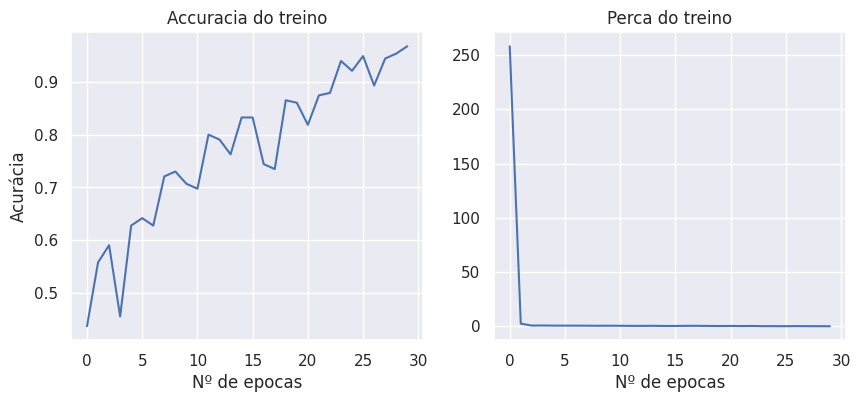

In [120]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
plt.plot(historico.history['accuracy'])
plt.title('Accuracia do treino')
plt.xlabel('Nº de epocas')
plt.ylabel('Acurácia')

plt.subplot(1,2,2)
plt.plot(historico.history['loss'])
plt.title('Perca do treino')
plt.xlabel('Nº de epocas')
plt.plot();

## Avaliação de Rede Neural

In [121]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [122]:
previsoes = network.predict(X_test)
previsoes = (previsoes > 0.5).astype('int').ravel()
previsoes

2/2 [==============================] - 0s 10ms/step


array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [123]:
y_test

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [124]:
accuracy_score(y_test, previsoes)

0.7592592592592593

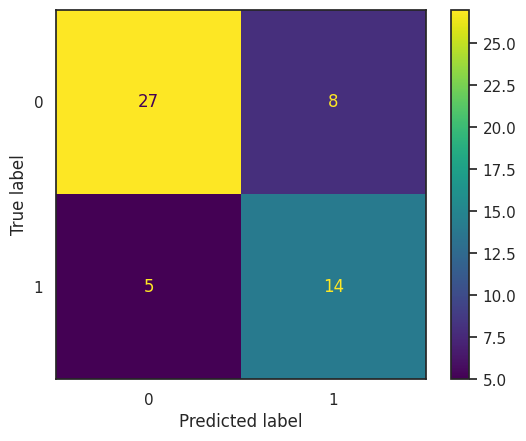

In [127]:
sns.set(style='white')
cm = confusion_matrix(y_test, previsoes)
fig = ConfusionMatrixDisplay(cm)
fig.plot();

## Validação Cruzada Modelo

In [142]:
# from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold

In [143]:
def cria_modelo():
    network = keras.models.Sequential()
    network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu', input_shape=(camadas_input,)))
    network.add(keras.layers.Dropout(0.2))
    network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu'))
    network.add(keras.layers.Dropout(0.2))
    network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu'))
    network.add(keras.layers.Dropout(0.2))
    network.add(keras.layers.Dense(units=camadas_ocultas, activation='relu'))
    network.add(keras.layers.Dropout(0.2))
    network.add(keras.layers.Dense(units=camadas_output, activation='sigmoid'))
    network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return network

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
modelo = KerasClassifier(model= cria_modelo, epochs=10, batch_size=10, verbose=True)

resultados = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')

In [146]:
resultados

array([0.62962963, 0.61111111, 0.75925926, 0.66666667, 0.79245283])

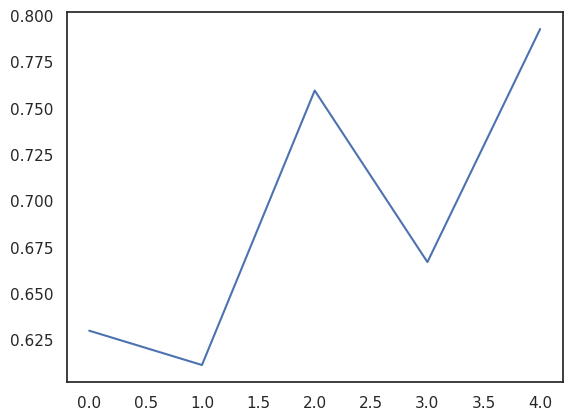

In [148]:
plt.plot(resultados);

In [149]:
resultados.mean()

0.6918238993710691

## Salvando o modelo

In [194]:
modelo_json = network.to_json()

with open('classificador_hormer_bart_rede_neural_simples_acc69a79.json', 'w') as file_json:
    file_json.write(modelo_json)

In [195]:
network.save_weights('pesos_hormer_bart_rede_neural_simples_acc69a79.hdf5')

## Classificação de uma imagem

In [184]:
def classificação_imagem(image):
    imagem = cv2.imread(image)
    image_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem_final = cv2.resize(image_rgb, (64,64))
    imagem_final = imagem_final / 255
    imagem_final = imagem_final.ravel()
    # print(imagem_final.reshape(1,-1))
    previsao = network.predict(imagem_final.reshape(1,-1))
    previsao = (previsao > 0.5).astype('int').ravel()[0]

    if previsao == 0:
        print('Bart')
    else:
        print('Hormer')
    plt.imshow(image_rgb);

1/1 [==============================] - 0s 61ms/step
Hormer


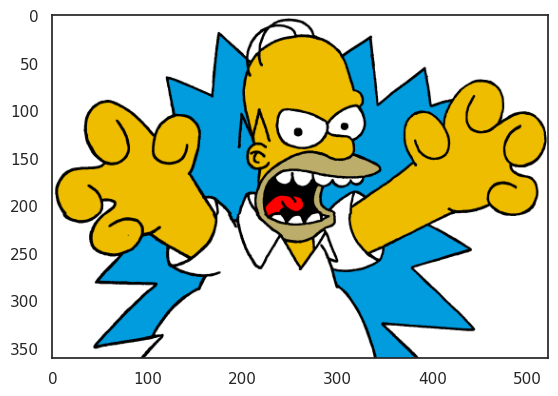

In [193]:
image = '/content/datasets/homer_bart_1/homer16.bmp'
classificação_imagem(image)